In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import explode, col, split, floor
import matplotlib.pyplot as plt


In [2]:
from pyspark.sql.functions import explode, split, col

# Create a Spark session with MongoDB support
spark = SparkSession.builder \
    .appName("BookGenomeProject") \
    .config("spark.mongodb.output.uri", "mongodb://127.0.0.1/book_genome.books") \
    .getOrCreate()

# Read JSON files into a DataFrame
books_df = spark.read.json(r"C:\Users\aleks\Documents\Maths\Files\book-genome\book_dataset\raw\survey_answers.json")

# Show the first 5 rows of the dataset to get an overview
books_df.show(5)

# Print the schema to understand the structure
books_df.printSchema()

# Drop rows with missing 'item_id' or 'score' (since 'title', 'genres', 'tags' do not exist)
books_df = books_df.dropna(subset=["item_id", "score"])


+-------+-----+------+-------+
|item_id|score|tag_id|user_id|
+-------+-----+------+-------+
| 604666|    5|   151|      2|
|1222101|    5|   151|      2|
|1272463|    5|   151|      2|
|1540236|    5|   151|      2|
|2157806|    1|   151|      2|
+-------+-----+------+-------+
only showing top 5 rows

root
 |-- item_id: long (nullable = true)
 |-- score: long (nullable = true)
 |-- tag_id: long (nullable = true)
 |-- user_id: long (nullable = true)



In [3]:
# Average rating for every book
average_scores_df = books_df.groupBy("item_id").agg({"score": "avg"})

# Filter out rows with average score less than 1
filtered_average_scores_df = average_scores_df.filter(col("avg(score)") >= 1)

# Show the filtered results
filtered_average_scores_df.show()

+--------+------------------+
| item_id|        avg(score)|
+--------+------------------+
| 3194786|1.0833333333333333|
|10867827|              2.15|
|13855759|               2.2|
|21500681|1.8571428571428572|
|19187812|2.3142857142857145|
|10935127|3.6666666666666665|
|30157568|               4.0|
| 2325789|2.3684210526315788|
| 1294261|1.4705882352941178|
| 3462456| 2.050251256281407|
|  266624| 2.084070796460177|
|25807847|1.4482758620689655|
| 1565818| 2.063106796116505|
|  133406|               5.0|
|53941188|1.2857142857142858|
| 3207953|1.8493150684931507|
|14103064|2.5301204819277108|
|45502249|3.2222222222222223|
| 2080738|               1.0|
| 4912783|1.2268370607028753|
+--------+------------------+
only showing top 20 rows



In [4]:
# Amount of ratings for each tag
tag_counts_df = books_df.groupBy("tag_id").count()
tag_counts_df.show()

+------+-----+
|tag_id|count|
+------+-----+
|    26|  235|
|    29|  288|
|   474|   76|
|   191|  123|
|    65|  201|
|   541|  184|
|   418|   82|
|   558|   42|
|   222|  160|
|   293|  175|
|   270|   49|
|   367|   56|
|   243|  144|
|   278|   80|
|   442|   26|
|   705|   25|
|   720|   34|
|    19|  377|
|    54|   81|
|   296|   56|
+------+-----+
only showing top 20 rows



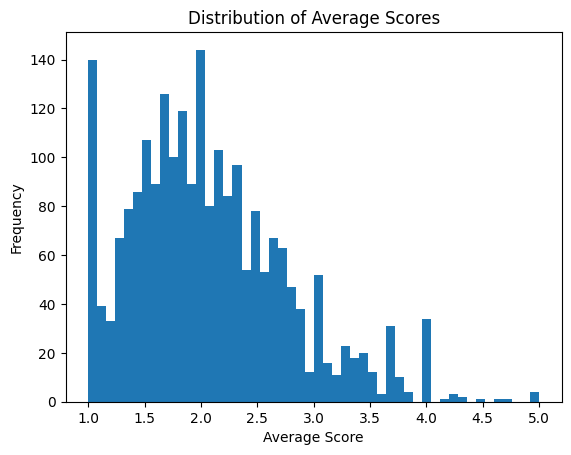

In [5]:
# Plotting the average score distribution
average_scores = filtered_average_scores_df.toPandas()
plt.hist(average_scores['avg(score)'], bins=50)
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.title('Distribution of Average Scores')
plt.show()

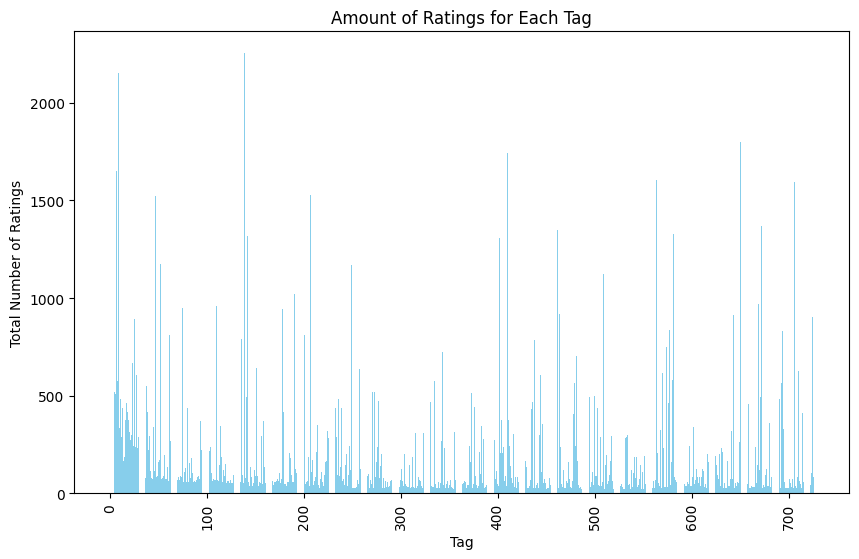

In [8]:
# Convert to Pandas DataFrame for visualization
tag_counts_pandas_df = tag_counts_df.toPandas()

# Plotting a bar chart for the grouped tag counts
plt.figure(figsize=(10, 6))
plt.bar(tag_counts_pandas_df['tag_id'], tag_counts_pandas_df['count'], color='skyblue')
plt.xlabel('Tag')
plt.ylabel('Total Number of Ratings')
plt.title('Amount of Ratings for Each Tag')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()